In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
data = pd.read_csv("./data/competition_data.csv")

Todas las variables

accepts_mercadopago Whether the item accepts Mercado Pago. TODOS ACEPTAN, LA SACO
available_quantity The available stock quantity at that moment. ELIMINO LAS OBS CON >20000
avg_gmv_item_domain_30days Average revenue generated by the items of this domain on the last month. TA BIEN
avg_gmv_item_sel Average revenue of items of this seller. TA BIEN
avg_gmv_seller_bday Average revenue this seller makes by day. TA BIEN
avg_qty_orders_item_domain_30days Average number of orders a random item of this domain made on the last month. TA BIEN
avg_qty_orders_item_sel_30days Average number of orders an item of this seller makes on the last 30 days. TA BIEN
avg_si_item_sel_30day Average units sold of an item of this seller on the past month. TA BIEN
benefit Ignore, should be dropped. LA SACO
boosted Whether the item was boosted. TODOS FALSE, LA SACO
category_id Category of this item LA SACO
conversion Target variable, it is True if this print has an attributed order
date Print date.   TIMESTAMP  
deal_print_id Unique id for the print. LA SACO
domain_id Domain id for the item.   MLA-SNEAKERS  1742 valores distintos, se le puede hacer w2v
etl_version Ignore, should be dropped. LA SACO
free_shipping Whether the item has free shipping. TA BIEN
fulfillment Whether the item is fulfilled by MeLi. TA BIEN
full_name Category full name. Celulares y Teléfonos -> Celulares y Smartphones 2280 valores dist w2v?
health Item health. TA BIEN
is_pdp Whether the click landed on a PDP. LE HAGO OHE
product_id Product_id of the item. 152362 NAs, la saco. No tiene sentido usarla en un arbol
item_id ID of the item, useful for debugging. LO SACO
listing_type_id Whether the item is gold or not. OHE
logistic_type Logistic type for the item. OHE
main_picture URL for the main item picture. LA SACO
offset On which page the item was rendered. TA BIEN
original_price Price from which the discount was done. TA BIEN
platform Which platform the user is using. OHE
price Item price. TA BIEN   se podria hacer una columnas mas con el descuento en %
print_position Position on the page. TA BIEN
print_server_timestamp Timestamp for the print. LA SACO
qty_items_dom Number of items this domain has. TA BIEN
qty_items_sel Number of items the seller has. TA BIEN
rn Leftover from the ETL, Discard. LA SACO
ROW_ID Row of the submission file
site_id Site ID. LA SACO
sold_quantity Number of items sold at the moment of the print. TA BIEN
tags Tags the item had at the moment of the print. Se le puede hacer w2v
title Item title. Se le puede hacer w2v
total_asp_item_domain_30days Average selling price of the items of the domain
total_asp_item_sel_30days Average selling price of all the items the seller sold on the last 30 days
total_gmv_domain_bday total_gmv_domain_30days / 30       Total revenue the domain made on the last 30 days
total_gmv_item_30days Total revenue made by the item on the lasts 30 days
total_items_domain Number of items on the domain
total_items_seller Number of items the seller has
total_orders_domain_30days Total orders on the domain
total_orders_item_30days Total orders the Item had on the last 30 days
total_orders_sel_30days Total orders for the seller
total_si_domain_30days Total units sold of this domain
total_si_item_30days Total units sold of this item
total_si_sel_30days Same for the seller 
total_visits_domain Total visits on this domain
total_visits_item Total visits this item had
total_visits_seller Total visits for this seller
uid session id. LA SACO
user_id user id. LA SACO
warranty Whether the item had warranty. LA SACO
conversion should be predicted for those rows where ROW_ID is not missing.

SOLO SE PUEDEN ELIMINAR OBSERVACIONES DE TRAIN
DE TEST NO PUEDO ELIMINAR

Columnas posibles de w2v
domain_id - MLA-SNEAKERS  1742 valores distintos, se le puede hacer w2v
full_name Category full name. Celulares y Teléfonos -> Celulares y Smartphones 2280 valores dist
tags - [brand_verified, good_quality_picture, good_quality_thumbnail, loyalty_discount_eligible, immediate_payment, cart_eligible] 1227 valores distintos
title - Auriculares Bluetooth Inalambricos In Ear Con Base Recargable 26000 distintos



Columnas a eliminar:
accepts_mercadopago- todos true
benefit- dice que hay que sacarla
boosted - Todos false
category_id - MLA109027 no tiene sentido
deal_print_id - no tiene sentido
etl_version - dice que hay que sacarla
product_id - no tiene sentido
item_id - dice esto useful for debugging.  no se para que podria servir. hay 27695 items distintos
main_picture 
print_server_timestamp - saco la data de alguna de las 2 y las borro
date - saco la data de alguna de las 2 y las borro
rn
site_id - MLA todas dicen eso
uid
user_id
warranty


UNA VEZ QUE DIVIDO EN TRAIN Y TEST: ELIMINO las obs con available_quantity>20000



OHE
is_pdp
listing_type_id
logistic_type
platform


In [41]:
print(sum(data['accepts_mercadopago'] == True),
sum(data['accepts_mercadopago'] == False))

#Todos aceptan mercado pago, la saco

199972 0


In [42]:
data[data['available_quantity']>20000].count()
#data[data['available_quantity'].isna()].count()  No hay nulos
#No tienen mucho sentido, no existe tener 99999 de un producto ni tampoco cantidades muy grandes

accepts_mercadopago                  3489
available_quantity                   3489
avg_gmv_item_domain_30days           3217
avg_gmv_item_sel                     3217
avg_gmv_seller_bday                  3217
avg_qty_orders_item_domain_30days    3217
avg_qty_orders_item_sel_30days       3217
avg_si_item_sel_30day                3217
benefit                              3489
boosted                              3489
category_id                          3489
conversion                           2797
date                                 3489
deal_print_id                        3489
domain_id                            3489
etl_version                          3489
free_shipping                        3489
fulfillment                          3489
full_name                            3489
health                               3489
is_pdp                               2179
product_id                            182
item_id                              3489
listing_type_id                   

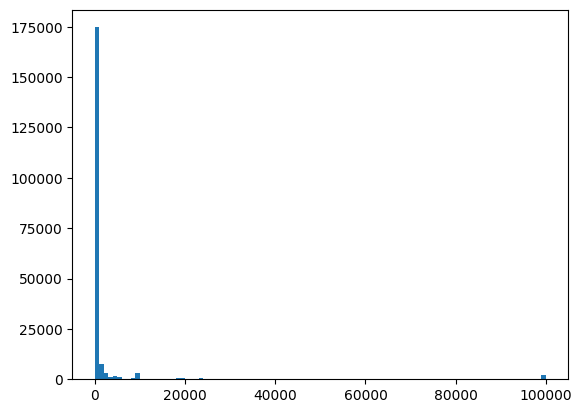

In [43]:
plt.hist(data['available_quantity'], bins=100)
plt.show()

In [44]:
len(data[data['available_quantity']>20000])/len(data)
#El 1.7% de los datos tienen mas de 20000 unidades disponibles, los deberia sacar ya que no tiene sentido

0.017447442641969877

In [65]:
data[data['available_quantity']> 10000][["title","product_id", "avg_si_item_sel_30day", "available_quantity", "total_si_sel_30days", 'sold_quantity'] ].sort_values(by="available_quantity", ascending=False).head(40)

,title,product_id,avg_si_item_sel_30day,available_quantity,total_si_sel_30days,sold_quantity
168617,Yerba Mate Rosamonte 500g Con Palo Libre Glute...,NaN,NaN,99999,NaN,0
101395,Yerba Mate Rosamonte 500g Con Palo Libre Glute...,NaN,NaN,99999,NaN,0
36089,Yerba Mate Rosamonte 500g Con Palo Libre Glute...,NaN,NaN,99999,NaN,0
24543,Yerba Mate Rosamonte 500g Con Palo Libre Glute...,NaN,NaN,99999,NaN,0
138025,Fideos De Semola Tirabuzon 500g 308 Pasta Seca...,NaN,NaN,99999,NaN,0
4985,Fideos De Semola Tirabuzon 500g 308 Pasta Seca...,NaN,NaN,99999,NaN,0
99408,Alfajor Mini Fantoche Chocolate Dulce De Leche...,NaN,NaN,99999,NaN,0
36672,Yerba Mate Rosamonte 500g Con Palo Libre Glute...,NaN,NaN,99999,NaN,0
100506,Yerba Mate Rosamonte 500g Con Palo Libre Glute...,NaN,NaN,99999,NaN,0
136943,Yerba Mate Rosamonte 500g Con Palo Libre Glute...,NaN,NaN,99999,NaN,0


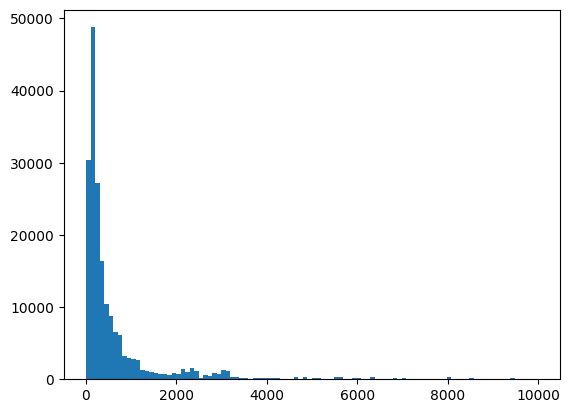

,title,avg_gmv_item_sel,available_quantity,total_si_item_30days,total_si_sel_30days,sold_quantity,item_id
25193,Jardin Vertical Artificial Panel Cesped La Mej...,137.292778,4483,368.0,1801.0,32369,MLA639104184
87186,Jardin Vertical Artificial Panel Cesped La Mej...,135.769350,4483,316.0,1782.0,32369,MLA639104184
2106,Jardin Vertical Artificial Panel Cesped La Mej...,137.292778,4483,368.0,1801.0,32369,MLA639104184
173003,Jardin Vertical Artificial Panel Cesped La Mej...,137.292778,4483,368.0,1801.0,32369,MLA639104184
161840,Jardin Vertical Artificial Panel Cesped La Mej...,137.292778,4483,368.0,1801.0,32369,MLA639104184
140605,Jardin Vertical Artificial Panel Cesped La Mej...,137.292778,4483,368.0,1801.0,32369,MLA639104184
55140,Jardin Vertical Artificial Panel Cesped La Mej...,137.292778,4483,368.0,1801.0,32369,MLA639104184
5788,Jardin Vertical Artificial Panel Cesped La Mej...,137.292778,4483,368.0,1801.0,32369,MLA639104184
21857,Jardin Vertical Artificial Panel Cesped La Mej...,137.292778,4483,368.0,1801.0,32369,MLA639104184
28440,Jardin Vertical Artificial Panel Cesped La Mej...,137.292778,4483,368.0,1801.0,32369,MLA639104184


In [85]:
plt.hist(data[data['avg_gmv_item_sel']<10000]['avg_gmv_item_sel'], bins=100)
plt.show()
data[["title", "avg_gmv_item_sel", "available_quantity","total_si_item_30days", "total_si_sel_30days",'sold_quantity', 'item_id'] ].sort_values(by="sold_quantity", ascending=False).head(40)

In [98]:
(data['item_id'].value_counts())

item_id
MLA784334044    717
MLA764888251    701
MLA847531773    622
MLA785891221    535
MLA766402693    517
               ... 
MLA833936427      1
MLA663926326      1
MLA784136287      1
MLA812482695      1
MLA762298064      1
Name: count, Length: 27695, dtype: int64